Predictive model: We use a predictive model to classify patients who have                        
stroke. We evaluate the performance of the model and suggest which features may be                         
useful in stroke prediction.

Written by Thomas Bourton

In [1]:
#Import Libs
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import seaborn as sns

In [2]:
training_data= pd.read_csv("train_2v.csv")
test_data=pd.read_csv("test_2v.csv")

In [3]:
training_data.head(n=15)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
5,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,NaN,0
6,52800,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
7,41413,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
8,15266,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0
9,28674,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0


In [4]:
training_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [5]:
test_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
count,18601.000000,18601.000000,18601.000000,18601.000000,18601.000000,18010.000000
mean,36747.368045,42.056504,0.093167,0.048062,104.386359,28.545325
std,21053.151124,22.528018,0.290674,0.213903,42.606714,7.757092
min,2.000000,0.080000,0.000000,0.000000,55.000000,10.200000
25%,18542.000000,24.000000,0.000000,0.000000,77.550000,23.300000
50%,36717.000000,43.000000,0.000000,0.000000,91.830000,27.700000
75%,55114.000000,60.000000,0.000000,0.000000,112.310000,32.800000
max,72942.000000,82.000000,1.000000,1.000000,275.720000,88.300000


In [44]:
training_data['stroke'].value_counts()

0    42617
1      783
Name: stroke, dtype: int64

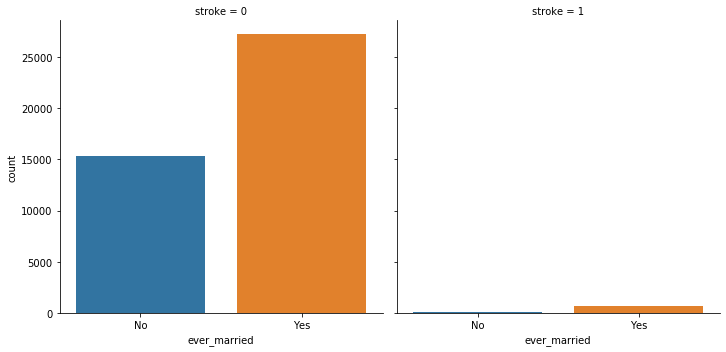

In [6]:
sns.catplot(x='ever_married',kind='count',col='stroke',data=training_data)

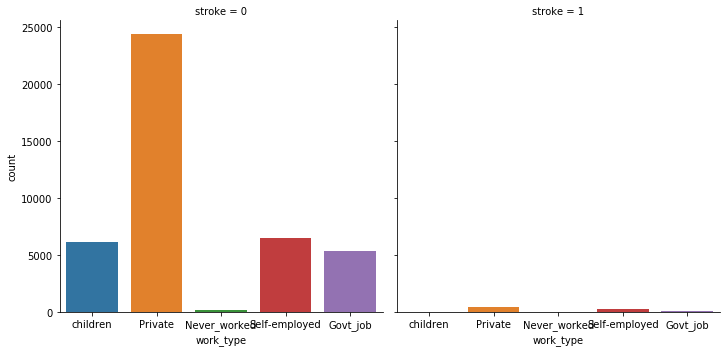

In [7]:
sns.catplot(x='work_type',kind='count',col='stroke',data=training_data)

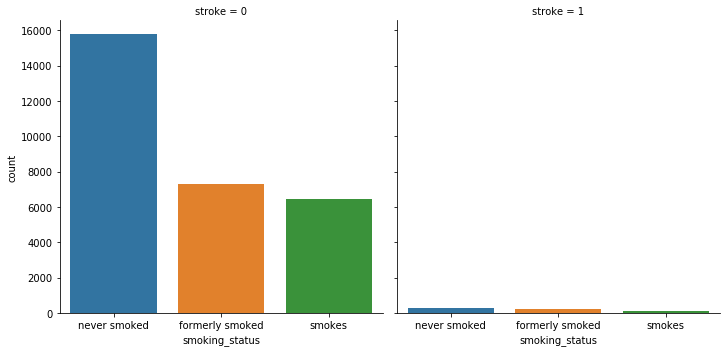

In [8]:
sns.catplot(x='smoking_status',kind='count',col='stroke',data=training_data)

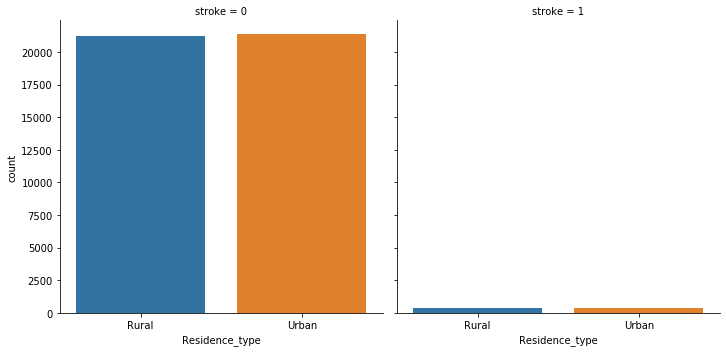

In [9]:
sns.catplot(x='Residence_type',kind='count',col='stroke',data=training_data)

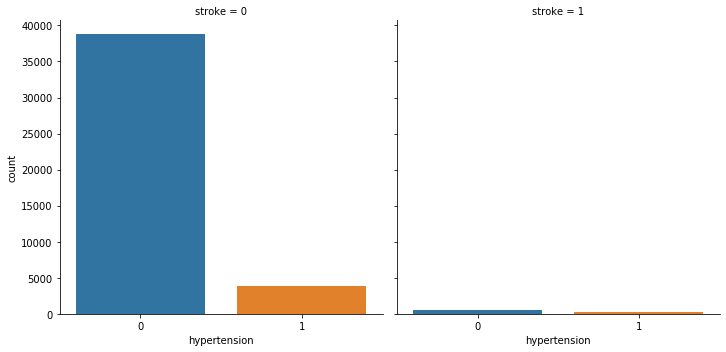

In [10]:
sns.catplot(x='hypertension',kind='count',col='stroke',data=training_data)

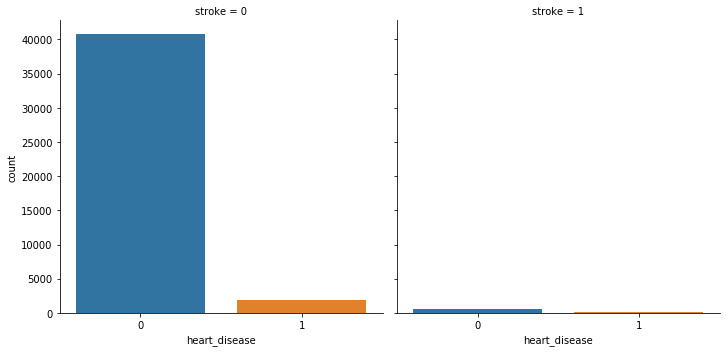

In [11]:
sns.catplot(x='heart_disease',kind='count',col='stroke',data=training_data)

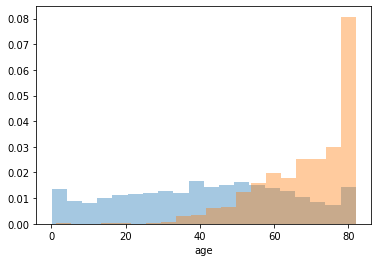

In [12]:
sns.distplot(training_data.loc[training_data['stroke'] == 0]['age'],kde=False, norm_hist=True, bins=20)
sns.distplot(training_data.loc[training_data['stroke'] == 1]['age'],kde=False, norm_hist=True, bins=20)

C:\Users\Tom\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Tom\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


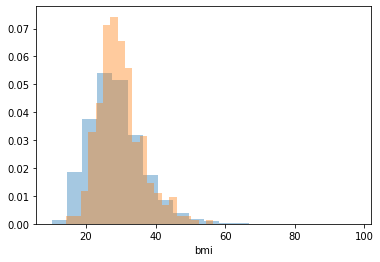

In [13]:
sns.distplot(training_data.loc[training_data['stroke'] == 0]['bmi'],kde=False, norm_hist=True, bins=20)
sns.distplot(training_data.loc[training_data['stroke'] == 1]['bmi'],kde=False, norm_hist=True, bins=20)

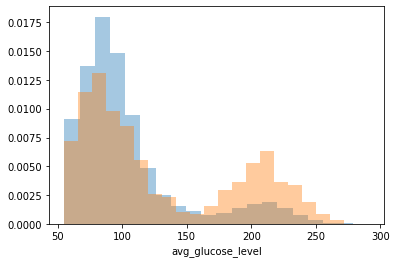

In [14]:
sns.distplot(training_data.loc[training_data['stroke'] == 0]['avg_glucose_level'],kde=False, norm_hist=True, bins=20)
sns.distplot(training_data.loc[training_data['stroke'] == 1]['avg_glucose_level'],kde=False, norm_hist=True, bins=20)

# Data Wrangling

### Missing data

In [15]:
#check for missing trainign_data
missing_training_data = training_data.isnull()
for column in missing_training_data.columns.values.tolist():
    if True in missing_training_data[column].value_counts().index.tolist():
        print(column)
        print (missing_training_data[column].value_counts())
        print("") 

bmi
False    41938
True      1462
Name: bmi, dtype: int64

smoking_status
False    30108
True     13292
Name: smoking_status, dtype: int64



In [16]:
#check for missing test_data
missing_test_data = test_data.isnull()
for column in missing_test_data.columns.values.tolist():
    if True in missing_test_data[column].value_counts().index.tolist():
        print(column)
        print (missing_test_data[column].value_counts())
        print("") 

bmi
False    18010
True       591
Name: bmi, dtype: int64

smoking_status
False    12850
True      5751
Name: smoking_status, dtype: int64



Clearly bmi and smoking_status contain a lot of missing values in both training and test data
For BMI we can replace the missing data with the average

In [17]:
training_data['bmi'].replace(np.nan, training_data['bmi'].astype('float').mean(axis=0), inplace=True)
test_data['bmi'].replace(np.nan, test_data['bmi'].astype('float').mean(axis=0), inplace=True)

~30% of smoking data is missing, hence it seems reasonable to consider dropping this data or replacing it

## Catagorised data
we are going to build decision tree so we need to turn "ever_married, work_type, residence_type,smoking status" to numerical values

In [18]:
lbl=preprocessing.LabelEncoder()
training_data['gender'] = lbl.fit_transform(training_data['gender'])
training_data['ever_married'] = lbl.fit_transform(training_data['ever_married'])
training_data['work_type'] = lbl.fit_transform(training_data['work_type'])
training_data['Residence_type'] = lbl.fit_transform(training_data['Residence_type'])
test_data['gender'] = lbl.fit_transform(test_data['gender'])
test_data['ever_married'] = lbl.fit_transform(test_data['ever_married'])
test_data['work_type'] = lbl.fit_transform(test_data['work_type'])
test_data['Residence_type'] = lbl.fit_transform(test_data['Residence_type'])

In [19]:
#We can consider dropping smoking data all together
training_data_nosmoke=training_data.drop(columns='smoking_status',axis=1,inplace=False)
test_data_nosmoke=test_data.drop(columns='smoking_status',axis=1,inplace=False)

# Or replace by mode
training_data['smoking_status'].fillna(training_data['smoking_status'].mode()[0], inplace=True)
training_data['smoking_status'] = lbl.fit_transform(training_data['smoking_status'])
test_data['smoking_status'].fillna(test_data['smoking_status'].mode()[0], inplace=True)
test_data['smoking_status'] = lbl.fit_transform(test_data['smoking_status'])

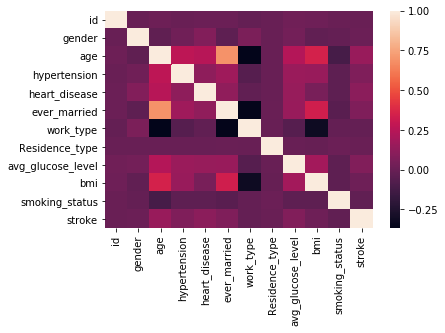

In [20]:
# Correlation heatmap
corr = training_data.corr()
sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns)

# Building the Decision Tree

Now that we have cleaned up our data we will build our decision tree

#### With mode smoking data

In [21]:
features = list(training_data.columns[1:11])
print(features)
X = training_data[features]
y = training_data['stroke']

['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']


In [22]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=2)
tree = DecisionTreeClassifier()
tree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [23]:
#prediction on the known test set
pred = tree.predict(X_testset)
print("Precision: ", metrics.precision_score(y_testset,pred))
print("Accuracy: ", metrics.accuracy_score(y_testset, pred))
print("Classification report: ")
print(metrics.classification_report(y_testset,pred))
print("")
print("Confusion matrix: ")
print(metrics.confusion_matrix(y_testset,pred))

Precision:  0.0892018779342723
Accuracy:  0.9612903225806452
Classification report: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8519
           1       0.09      0.12      0.10       161

    accuracy                           0.96      8680
   macro avg       0.54      0.55      0.54      8680
weighted avg       0.97      0.96      0.96      8680


Confusion matrix: 
[[8325  194]
 [ 142   19]]


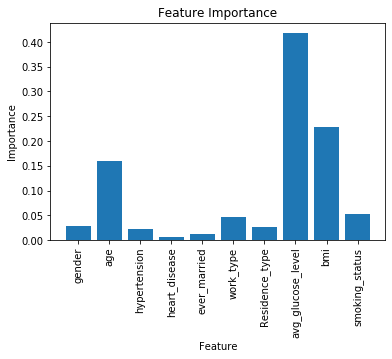

['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']


In [24]:
# plot feature importance
plt.bar(range(len(tree.feature_importances_)), tree.feature_importances_)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.xticks(range(len(tree.feature_importances_)), features,rotation='vertical')
plt.show()
print(features)

In [25]:
#prediction on unknown test data
pred=tree.predict(test_data[features])
prediction = pd.DataFrame(pred,columns=['pred_stroke'])
test_data['stroke']=prediction['pred_stroke']
test_data['stroke'].value_counts()

0    18238
1      363
Name: stroke, dtype: int64

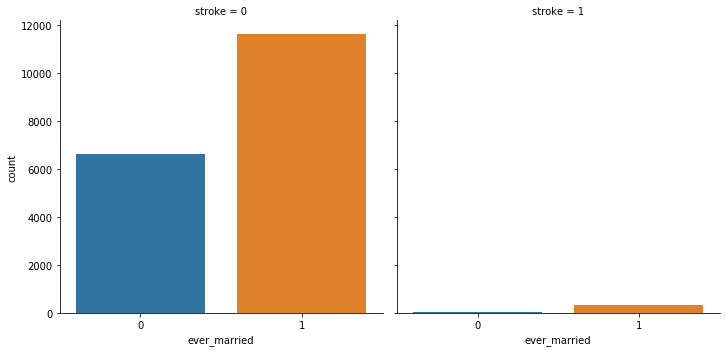

In [26]:
sns.catplot(x='ever_married',kind='count',col='stroke',data=test_data)

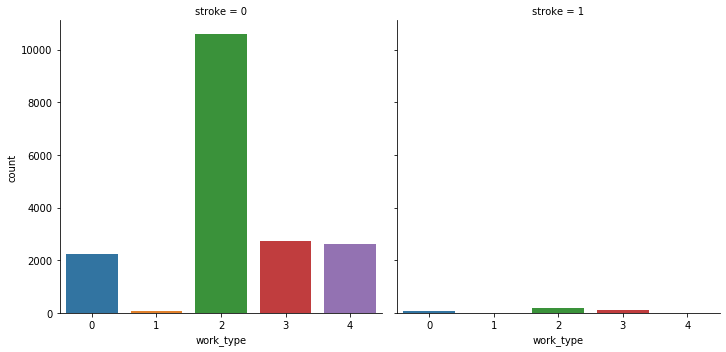

In [27]:
sns.catplot(x='work_type',kind='count',col='stroke',data=test_data)

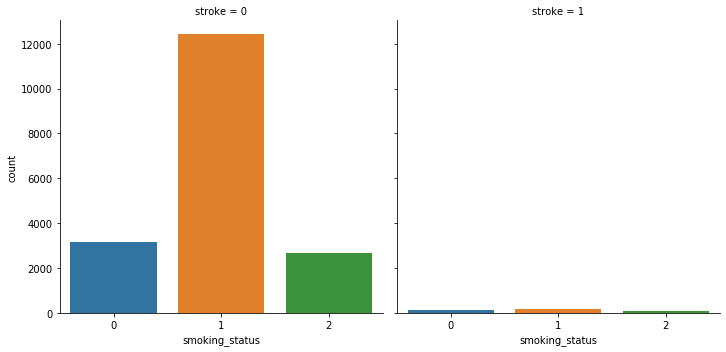

In [28]:
sns.catplot(x='smoking_status',kind='count',col='stroke',data=test_data)

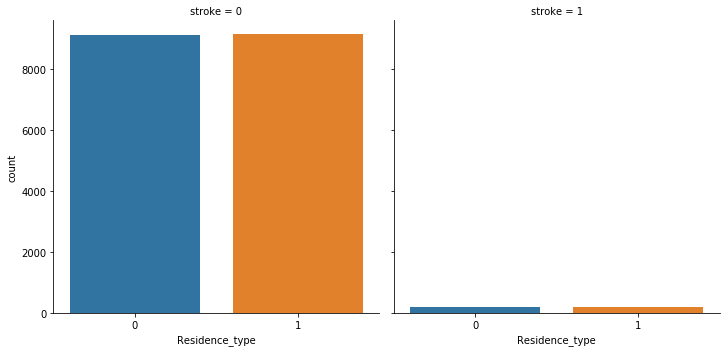

In [29]:
sns.catplot(x='Residence_type',kind='count',col='stroke',data=test_data)

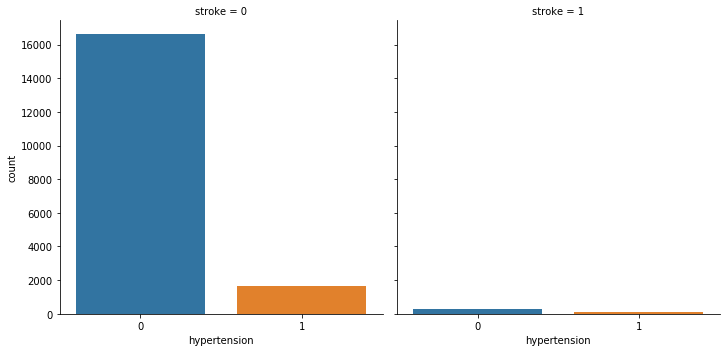

In [30]:
sns.catplot(x='hypertension',kind='count',col='stroke',data=test_data)

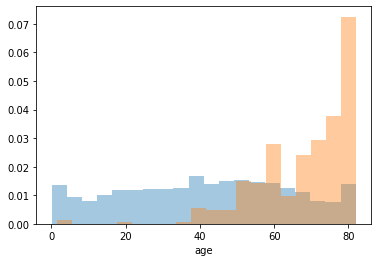

In [31]:
sns.distplot(test_data.loc[test_data['stroke'] == 0]['age'],kde=False, norm_hist=True, bins=20)
sns.distplot(test_data.loc[test_data['stroke'] == 1]['age'],kde=False, norm_hist=True, bins=20)

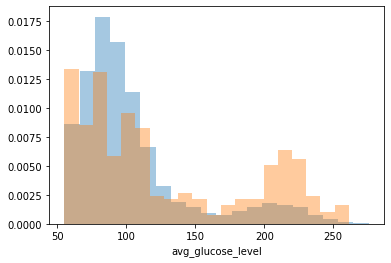

In [32]:
sns.distplot(test_data.loc[test_data['stroke'] == 0]['avg_glucose_level'],kde=False, norm_hist=True, bins=20)
sns.distplot(test_data.loc[test_data['stroke'] == 1]['avg_glucose_level'],kde=False, norm_hist=True, bins=20)

#### With smoking removed

In [33]:
features = list(training_data_nosmoke.columns[1:10])
print(features)
X = training_data_nosmoke[features]
y = training_data_nosmoke['stroke']

['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi']


In [34]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=2)
tree = DecisionTreeClassifier()
tree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [35]:
#prediction on the known test set
pred = tree.predict(X_testset)
print("Precision: ", metrics.precision_score(y_testset,pred))
print("Accuracy: ", metrics.accuracy_score(y_testset, pred))
print("Classification report: ")
print(metrics.classification_report(y_testset,pred))
print("")
print("Confusion matrix: ")
print(metrics.confusion_matrix(y_testset,pred))

Precision:  0.08955223880597014
Accuracy:  0.962442396313364
Classification report: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8519
           1       0.09      0.11      0.10       161

    accuracy                           0.96      8680
   macro avg       0.54      0.55      0.54      8680
weighted avg       0.97      0.96      0.96      8680


Confusion matrix: 
[[8336  183]
 [ 143   18]]


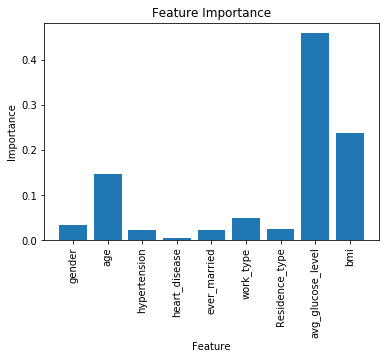

['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi']


In [36]:
# plot feature importance
plt.bar(range(len(tree.feature_importances_)), tree.feature_importances_)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.xticks(range(len(tree.feature_importances_)), features,rotation='vertical')
plt.show()
print(features)

In [37]:
#prediction on unknown test data
pred=tree.predict(test_data_nosmoke[features])
prediction = pd.DataFrame(pred,columns=['pred_stroke'])
test_data_nosmoke['stroke']=prediction['pred_stroke']
test_data_nosmoke['stroke'].value_counts()

0    18200
1      401
Name: stroke, dtype: int64

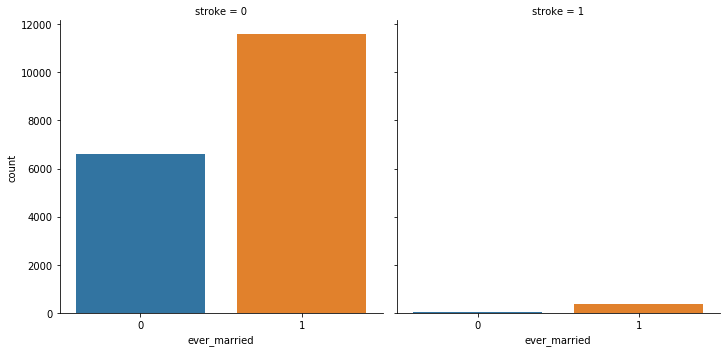

In [38]:
sns.catplot(x='ever_married',kind='count',col='stroke',data=test_data_nosmoke)

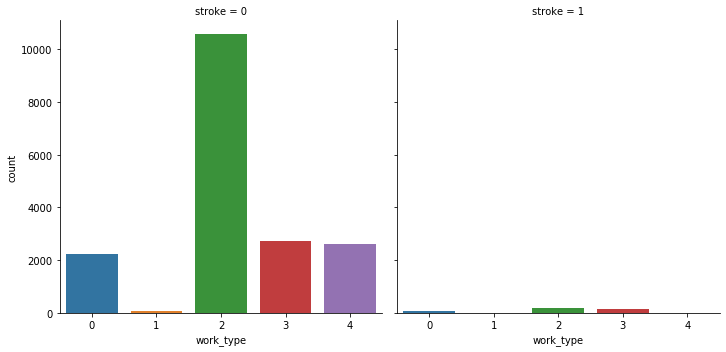

In [39]:
sns.catplot(x='work_type',kind='count',col='stroke',data=test_data_nosmoke)

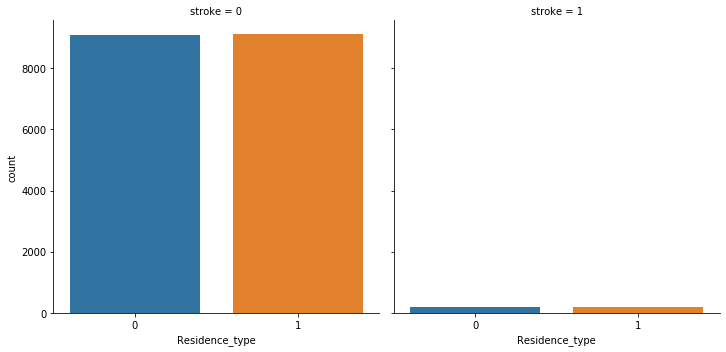

In [40]:
sns.catplot(x='Residence_type',kind='count',col='stroke',data=test_data_nosmoke)

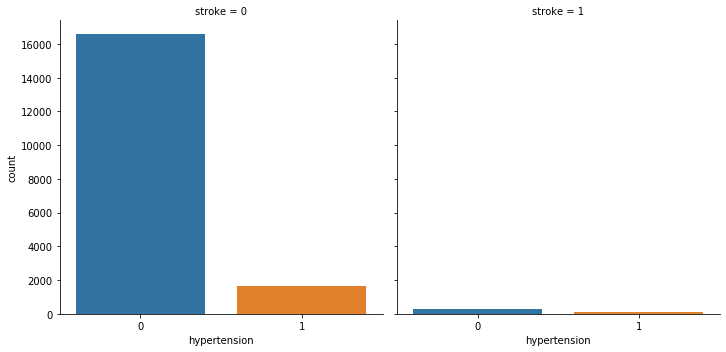

In [41]:
sns.catplot(x='hypertension',kind='count',col='stroke',data=test_data_nosmoke)

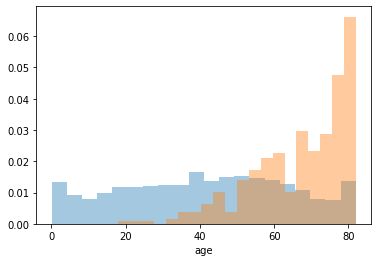

In [42]:
sns.distplot(test_data_nosmoke.loc[test_data_nosmoke['stroke'] == 0]['age'],kde=False, norm_hist=True, bins=20)
sns.distplot(test_data_nosmoke.loc[test_data_nosmoke['stroke'] == 1]['age'],kde=False, norm_hist=True, bins=20)

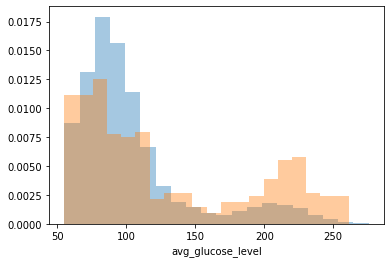

In [43]:
sns.distplot(test_data_nosmoke.loc[test_data_nosmoke['stroke'] == 0]['avg_glucose_level'],kde=False, norm_hist=True, bins=20)
sns.distplot(test_data_nosmoke.loc[test_data_nosmoke['stroke'] == 1]['avg_glucose_level'],kde=False, norm_hist=True, bins=20)